In [1]:
import sys
import logging
import pickle
import yaml
import matplotlib.cm as cm
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import time
import configs
import seaborn as sns

# Parameters

In [2]:
internal_dim = 16
generic_exp_name = 'postbug_gridworld8x8_shuffobs'
network_yaml = 'dm'

In [3]:
engram_dir = '/Volumes/aronov-locker/Ching/rl/'
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/' # Axon path
exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

# Load analysis

In [4]:
with open(f'{analysis_dir}representation_df.p', 'rb') as f:
    repr_df = pickle.load(f)
with open(f'{analysis_dir}dimensionality_df.p', 'rb') as f:
    dim_df = pickle.load(f)
with open(f'{analysis_dir}transition_df.p', 'rb') as f:
    transition_df = pickle.load(f)

In [5]:
dim_df.model = dim_df.model.str[len(generic_exp_name)+1:]

# Plot dimensionality measures

In [6]:
np.unique(repr_df.model)

array(['postbug_gridworld8x8_shuffobs_entro-1',
       'postbug_gridworld8x8_shuffobs_g0.25_-2_entro-2',
       'postbug_gridworld8x8_shuffobs_g0.5_-3_entro-2',
       'postbug_gridworld8x8_shuffobs_g0.8_-3_entro-2',
       'postbug_gridworld8x8_shuffobs_g0_-2_entro-1',
       'postbug_gridworld8x8_shuffobs_mf0',
       'postbug_gridworld8x8_shuffobs_noq_entro-1',
       'postbug_gridworld8x8_shuffobs_noq_g0_-2_entro-1',
       'postbug_gridworld8x8_shuffobs_noq_g0_-2_entro-2'], dtype=object)

In [7]:
hue_order = [
    'mf0', 'entro-1', 'g0_-2_entro-2', 'g0.25_-3_entro-1',
    'g0.5_-3_entro-1', 'g0.8_-4_entro0',]

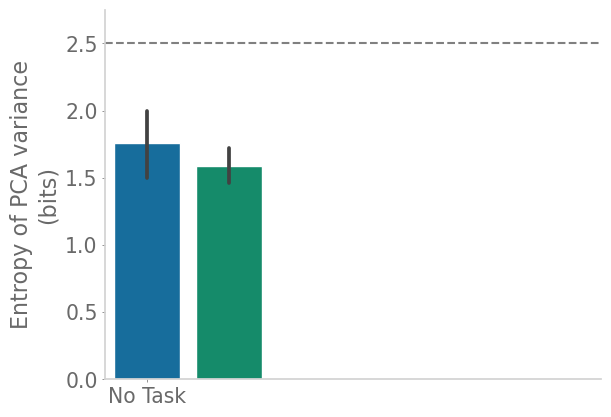

In [8]:
plt.figure()
colors = cm.get_cmap('Oranges')
c_steps = np.linspace(0.4, 0.8, 4, endpoint=True)
sns.barplot(
    x='model', y='entro', order=hue_order, data=dim_df,
    palette=['C0', 'C2', colors(c_steps[0]), colors(c_steps[1]), colors(c_steps[2]), colors(c_steps[3]),
          colors(c_steps[0]), colors(c_steps[1]), colors(c_steps[2]), colors(c_steps[3])])
plt.xticks([0], ['No Task'])
plt.xlabel(None)
plt.axhline(2.5, color='gray', linestyle='--')
plt.ylim(0, 2.75)
plt.ylabel('Entropy of PCA variance\n(bits)')
plt.show()

# Make 3D reduced latents plots

In [11]:
model = f'{generic_exp_name}_entro-1'

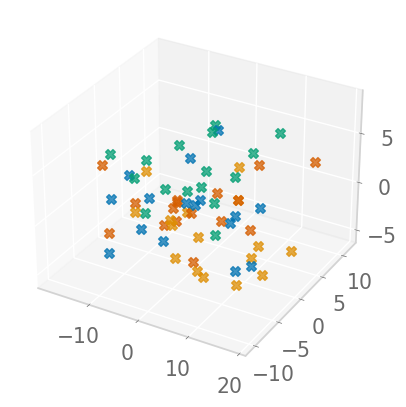

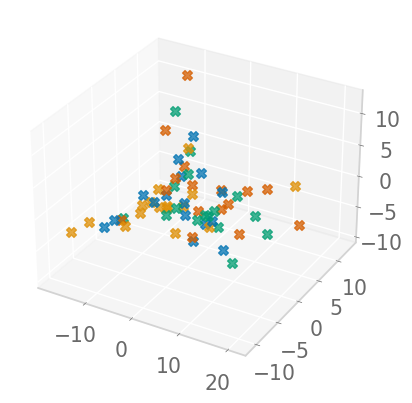

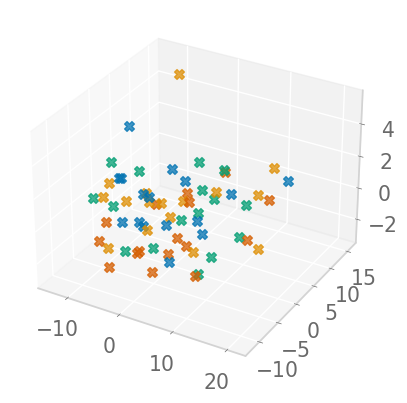

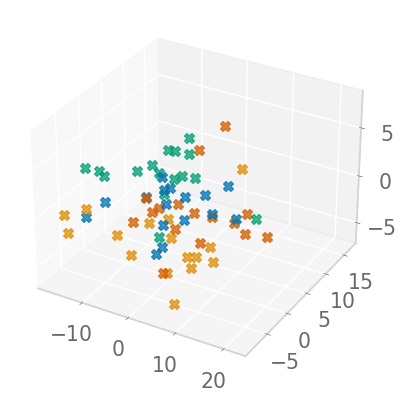

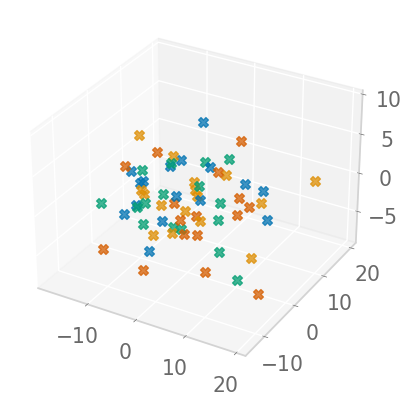

In [12]:
colors = ['C0', 'C1', 'C2', 'C3']
markers = ['s', '^', 'o']
iterations = np.unique(repr_df[repr_df['model']==model]['iteration'])
for i in iterations:
    _df = repr_df[(repr_df['model']==model) & (repr_df['iteration']==i)]
    _tdf = transition_df[
        (transition_df['model']==model) & (transition_df['iteration']==i)]
    latents = np.array(list(_df['latents']))
    quadrant_labels = np.array(list(_df['quadrant']))
    reducer = PCA(n_components=3)
    reducer.fit(latents)
    reduced_latents = reducer.transform(latents)
    
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    for i in np.arange(reduced_latents.shape[0]):
        ax.scatter(
            reduced_latents[i,0], reduced_latents[i,1], reduced_latents[i,2],
            color=colors[quadrant_labels[i]],
            marker='X', alpha=0.75, s=50
            )
    plt.show()

# 3D latent plots + transition lines

In [16]:
np.unique(repr_df.model)

array(['postbug_gridworld8x8_shuffobs_entro-1',
       'postbug_gridworld8x8_shuffobs_g0.25_-2_entro-2',
       'postbug_gridworld8x8_shuffobs_g0.5_-3_entro-2',
       'postbug_gridworld8x8_shuffobs_g0.8_-3_entro-2',
       'postbug_gridworld8x8_shuffobs_g0_-2_entro-1',
       'postbug_gridworld8x8_shuffobs_mf0',
       'postbug_gridworld8x8_shuffobs_noq_entro-1',
       'postbug_gridworld8x8_shuffobs_noq_g0_-2_entro-1',
       'postbug_gridworld8x8_shuffobs_noq_g0_-2_entro-2'], dtype=object)

In [17]:
model = f'{generic_exp_name}_g0_-2_entro-1'

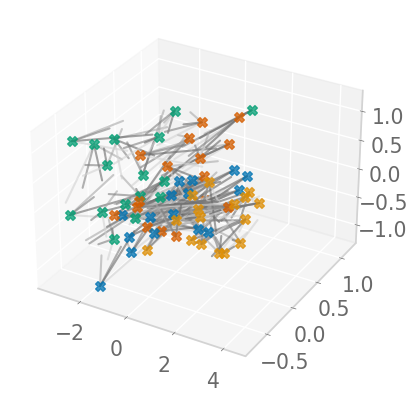

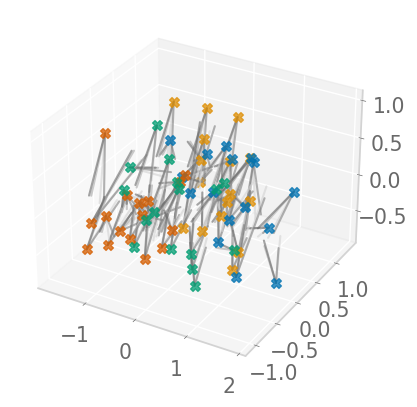

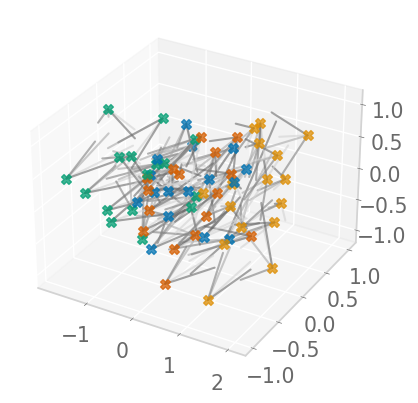

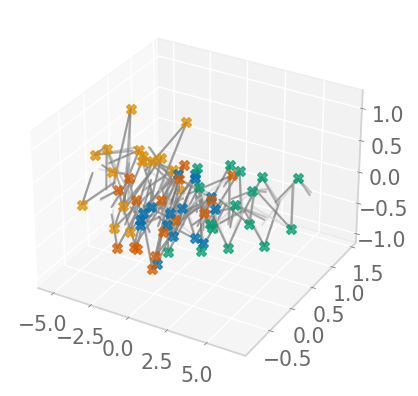

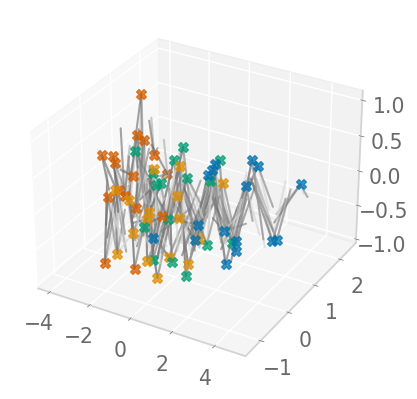

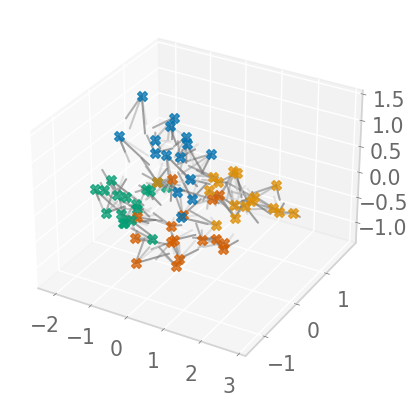

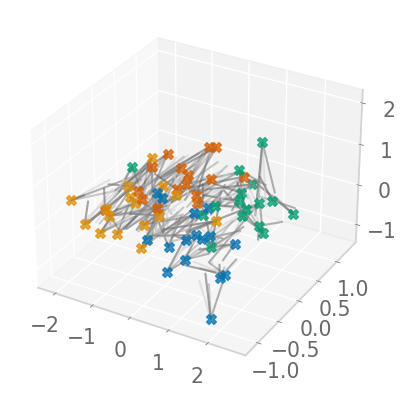

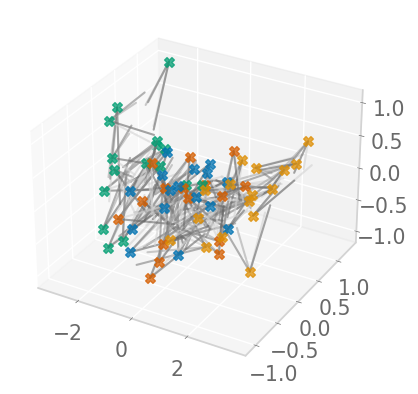

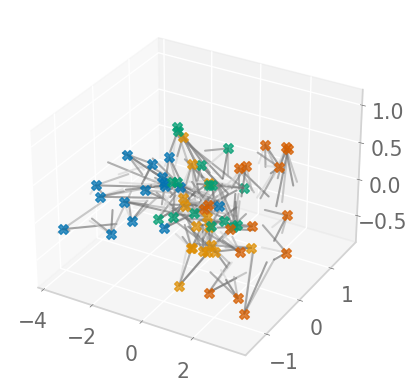

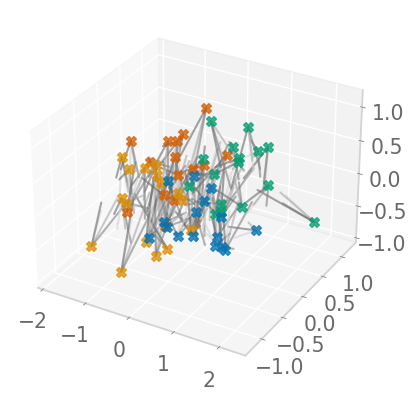

In [18]:
colors = ['C0', 'C1', 'C2', 'C3']
markers = ['s', '^', 'o']
actions = [0,1,2,3]
action_colors = ['lightgrey', 'darkgrey', 'gray', 'dimgray']
actions = [0,1,2,3]
iterations = np.unique(repr_df[repr_df['model']==model]['iteration'])
for i in iterations:
    _df = repr_df[(repr_df['model']==model) & (repr_df['iteration']==i)]
    _tdf = transition_df[
        (transition_df['model']==model) & (transition_df['iteration']==i)]
    latents = np.array(list(_df['latents']))
    quadrant_labels = np.array(list(_df['quadrant']))
    reducer = PCA(n_components=3)
    reducer.fit(latents)
    reduced_latents = reducer.transform(latents)
    
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    for i in np.arange(reduced_latents.shape[0]):
        x = _df.iloc[i]['x']
        y = _df.iloc[i]['y']
        pca_x, pca_y, pca_z = reduced_latents[i]
        ax.scatter(
            pca_x, pca_y, pca_z, color=colors[quadrant_labels[i]],
            marker='X', alpha=0.75, s=50)
        for a in actions:
            _trow = _tdf[(_tdf['x']==x) & (_tdf['y']==y) & (_tdf['action']==a)]
            transition = np.array(list(_trow['outputs']))
            reduced_transition = reducer.transform(transition)
            t_x, t_y, t_z = reduced_transition[0]
            plt.plot([pca_x, t_x], [pca_y, t_y], zs=[pca_z, t_z],
                color=action_colors[a], alpha=0.6)
    plt.show()

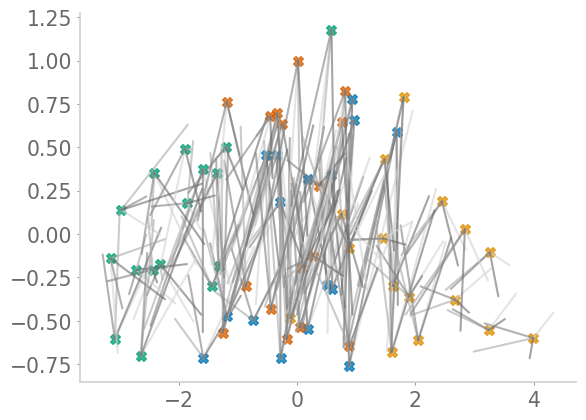

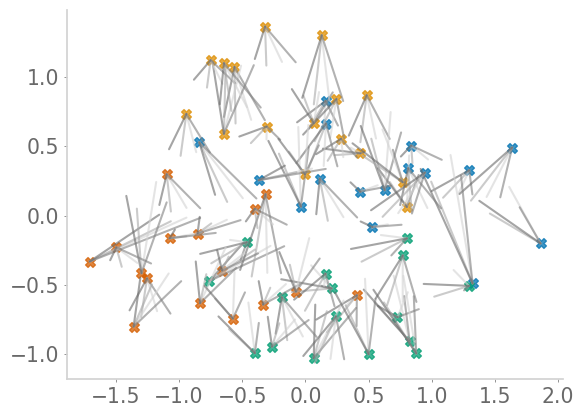

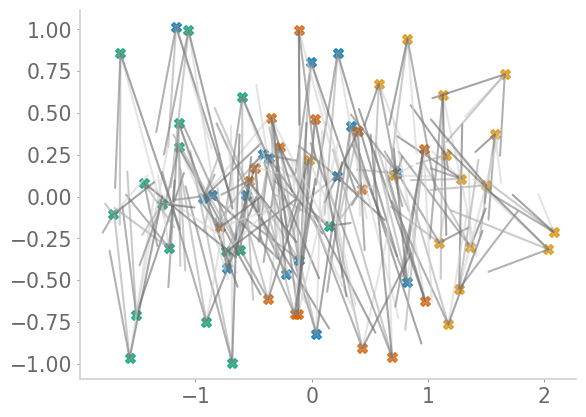

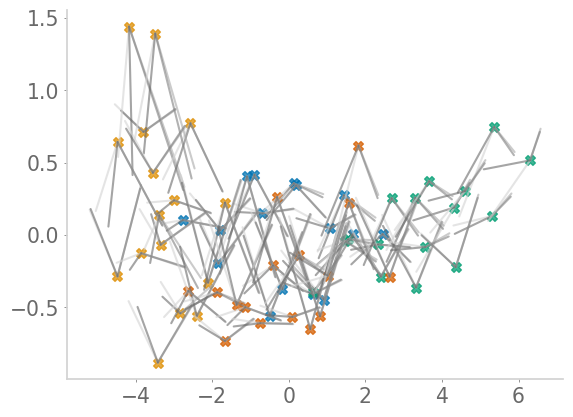

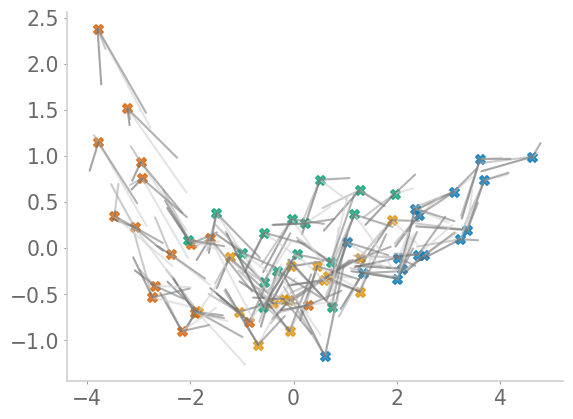

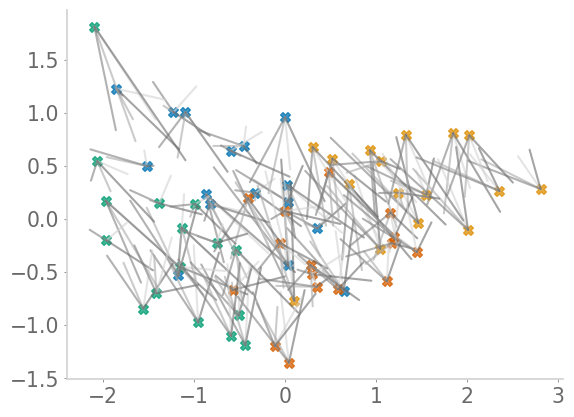

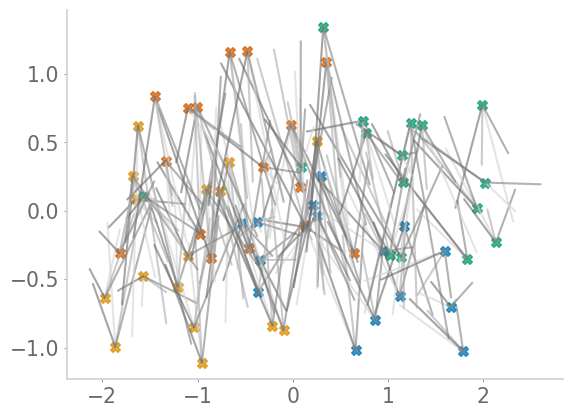

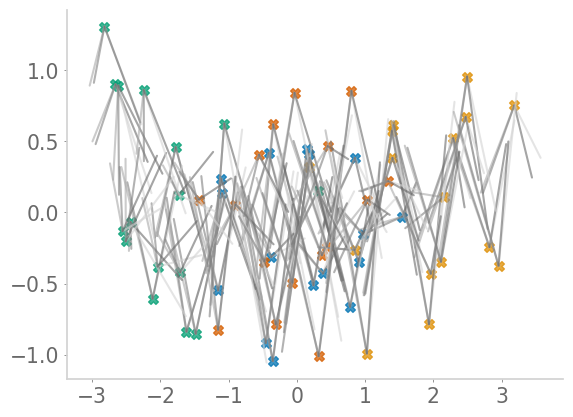

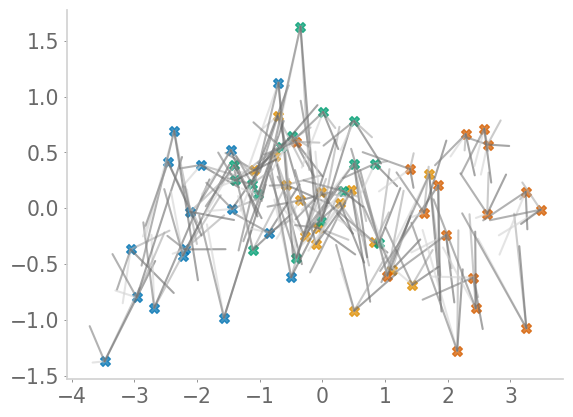

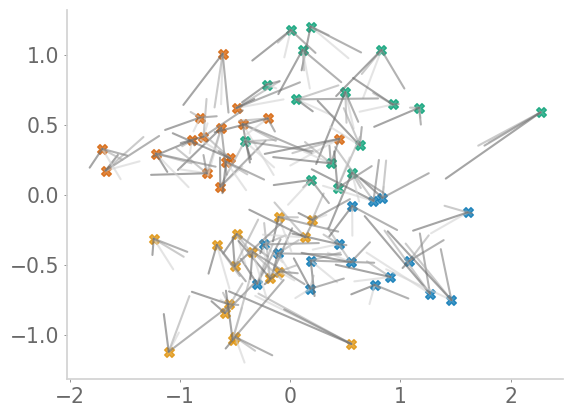

In [19]:
colors = ['C0', 'C1', 'C2', 'C3']
markers = ['s', '^', 'o']
actions = [0,1,2,3]
action_colors = ['lightgrey', 'darkgrey', 'gray', 'dimgray']
iterations = np.unique(repr_df[repr_df['model']==model]['iteration'])
for i in iterations:
    _df = repr_df[(repr_df['model']==model) & (repr_df['iteration']==i)]
    _tdf = transition_df[
        (transition_df['model']==model) & (transition_df['iteration']==i)]
    latents = np.array(list(_df['latents']))
    quadrant_labels = np.array(list(_df['quadrant']))
    reducer = PCA(n_components=3)
    reducer.fit(latents)
    reduced_latents = reducer.transform(latents)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in np.arange(reduced_latents.shape[0]):
        x = _df.iloc[i]['x']
        y = _df.iloc[i]['y']
        pca_x, pca_y, pca_z = reduced_latents[i]
        ax.scatter(
            pca_x, pca_y, color=colors[quadrant_labels[i]],
            marker='X', alpha=0.75, s=50)
        for a in actions:
            _trow = _tdf[(_tdf['x']==x) & (_tdf['y']==y) & (_tdf['action']==a)]
            transition = np.array(list(_trow['outputs']))
            reduced_transition = reducer.transform(transition)
            t_x, t_y, t_z = reduced_transition[0]
            plt.plot(
                [pca_x, t_x], [pca_y, t_y], color=action_colors[a],
                alpha=0.6
                )
    plt.show()